In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [27]:
np.random.seed(521)
Data = np.linspace(1.0 , 10.0 , num =100) [:, np. newaxis]
Target = np.sin( Data ) + 0.1 * np.power( Data , 2) \
+ 0.5 * np.random.randn(100 , 1)
randIdx = np.arange(100)
np.random.shuffle(randIdx)
trainData, trainTarget = Data[randIdx[:80]], Target[randIdx[:80]]
validData, validTarget = Data[randIdx[80:90]], Target[randIdx[80:90]]
testData, testTarget = Data[randIdx[90:100]], Target[randIdx[90:100]]

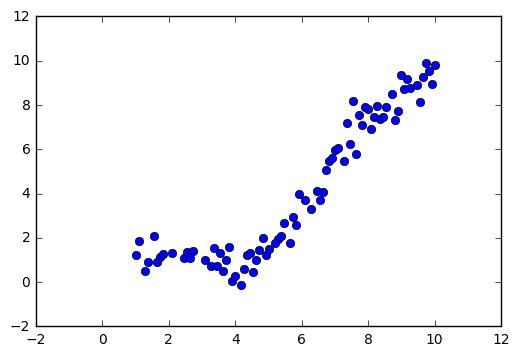

In [24]:
#plot of trainData
plt.plot(trainData, trainTarget, 'bo')
plt.axis([-2,12, -2, 12])
plt.show()

In [41]:
def pairwise_dist(x, z):
    z = tf.transpose(z)
    return tf.squared_difference(x, z)

In [44]:
#testing pairwise_dist function
x = tf.constant([[1],[2],[3],[4]])
z = tf.constant([[1],[2],[3]])
init = tf.global_variables_initializer()
sess = tf.InteractiveSession()
sess.run(init)
print(sess.run(pairwise_dist(x,z)))

[[0 1 4]
 [1 0 1]
 [4 1 0]
 [9 4 1]]


In [90]:
def get_respon_mat(m, k):
    values, indices = tf.nn.top_k(-m, k, sorted=True)
    
    return values, indices

In [92]:
sess.run(init)
M = tf.placeholder(tf.float32)
print(sess.run(get_respon_mat(tf.transpose(M), 6), feed_dict={M:trainData}))

(array([[-1.        , -1.09090912, -1.27272725, -1.36363637, -1.5454545 ,
        -1.63636363]], dtype=float32), array([[ 5, 62, 22, 17,  1, 26]]))


In [59]:
print(trainData.shape)

(80, 1)
